<a href="https://colab.research.google.com/github/LcsGondra/Bloco-Dados/blob/master/Achando_melhor_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install mglearn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import mglearn

In [43]:
cal = fetch_california_housing()

df = pd.DataFrame(data=np.c_[cal['data'], cal['target']], columns=cal['feature_names'] + cal['target_names'])


In [8]:
# print(cal.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [44]:
cal.keys()
print('cal target names: ', cal.target_names,'\n cal feature names:', cal.feature_names )

cal target names:  ['MedHouseVal'] 
 cal feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


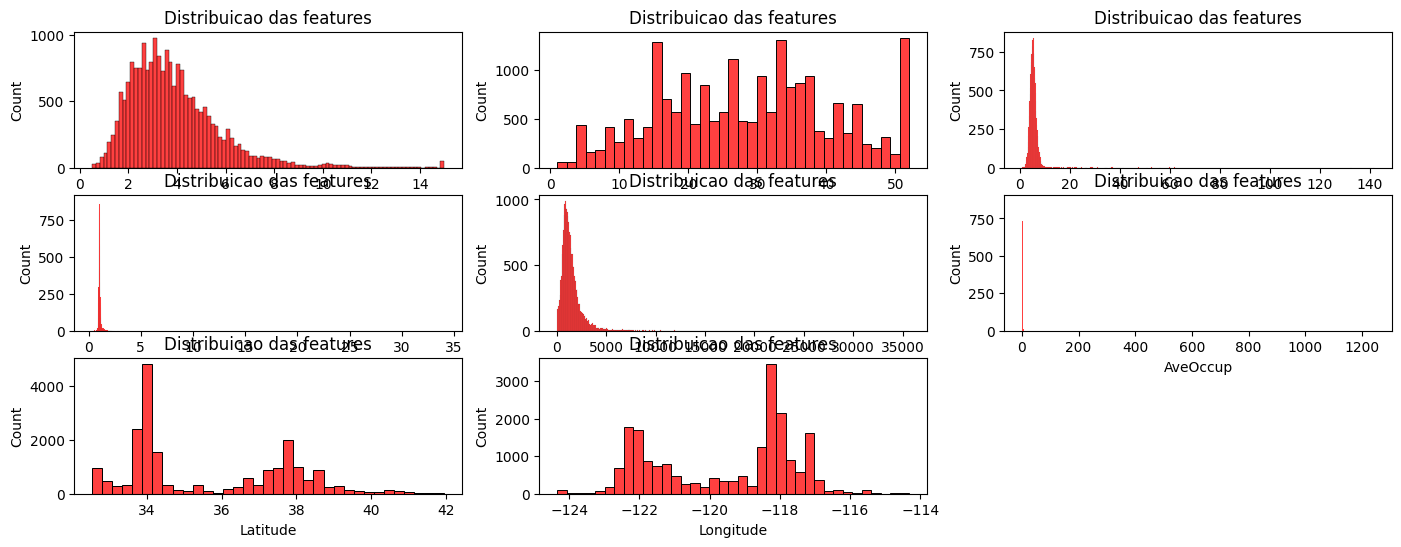

In [48]:
fig = plt.figure(figsize=(17,6))
plot_n = 331
for feat in cal.feature_names:
  ax = fig.add_subplot(plot_n)
  ax.set_title("Distribuicao das features")
  sns.histplot(df[feat], color='red', ax=ax)
  plot_n +=1

In [76]:
train_X, test_X, train_y, test_y = train_test_split(cal.data, cal.target, test_size=0.2, random_state=66)

In [77]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
power_train_X = pt.fit_transform(train_X)
power_test_X = pt.transform(test_X)

df_train = pd.DataFrame(data=np.c_[power_train_X, train_y], columns=cal['feature_names'] + cal['target_names'])

<Axes: >

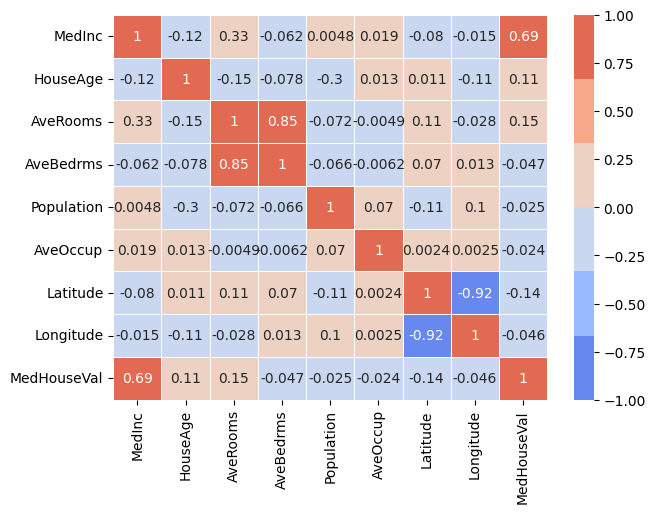

In [78]:
corr = df.corr()
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, vmin=-1, vmax=1, cmap=sns.color_palette("coolwarm"),linewidths=.5, annot=True)

<Axes: >

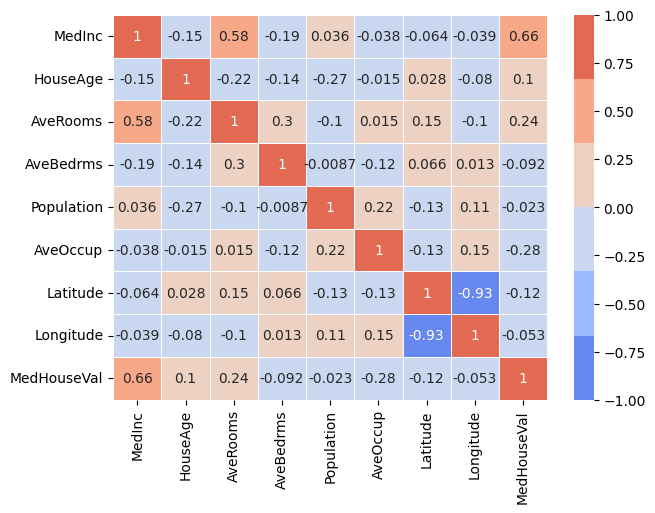

In [79]:
corr = df_train.corr()
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, vmin=-1, vmax=1, cmap=sns.color_palette("coolwarm"),linewidths=.5, annot=True)

In [107]:
feat_names = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude']
power_X = df_train[feat_names]

df_test = pd.DataFrame(data=np.c_[power_test_X, test_y], columns=cal['feature_names'] + cal['target_names'])

power_test_X = df_test[feat_names]

In [108]:
from sklearn.neighbors import KNeighborsRegressor

neighbors_settings = range(1, 15)

train_r2 = []
test_r2 = []

for n in neighbors_settings:
  knn = KNeighborsRegressor(n_neighbors=n)
  knn.fit(power_X, train_y)

  knn_pred_train_y = knn.predict(power_X)
  knn_pred_test_y = knn.predict(power_test_X)

  train_r2.append(knn.score(power_X, train_y))
  test_r2.append(knn.score(power_test_X, test_y))


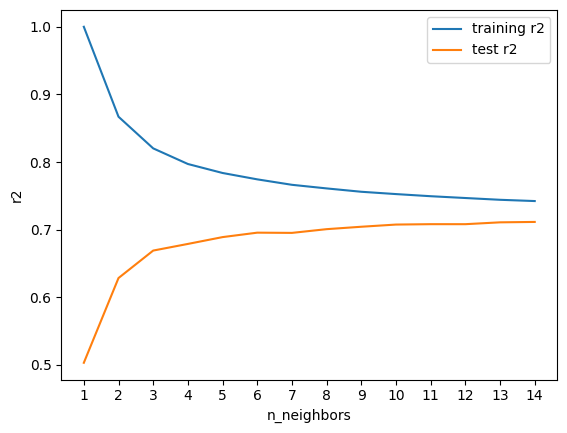

In [109]:
plt.plot(neighbors_settings, train_r2, label="training r2")
plt.plot(neighbors_settings, test_r2, label="test r2")
plt.ylabel("r2")
plt.xlabel("n_neighbors")
plt.xticks(range(1,15))
plt.legend()